In [1]:
#Import libraries
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  
from sklearn import tree

In [2]:
#run this cell 2 times as 1st time it gave runtime warning.
from pyAudioAnalysis import MidTermFeatures as aF

D:\virtualpython\myvenv\Lib\site-packages\pyAudioAnalysis\..\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [3]:
#Load the data
path = "D:\mtech\Speech Analytics\day2\music"
dirs = [path+"\\classical\\", path+"\\metal\\"] 
dirs

['D:\\mtech\\Speech Analytics\\day2\\music\\classical\\',
 'D:\\mtech\\Speech Analytics\\day2\\music\\metal\\']

In [4]:
#Define classes
class_names = ['classical', 'metal'] 
class_names

['classical', 'metal']

In [5]:
#initialize minimu window, minimum step, window size and step size
m_win, m_step, s_win, s_step = 1, 1, 0.1, 0.05

In [6]:
# segment-level feature extraction:
features = [] 
#Extract the features
for d in dirs: # get feature matrix for each directory (class)
    print(d)
    f, _, fn = aF.directory_feature_extraction(d, m_win, m_step, 
                                                   s_win, s_step) 
    features.append(f)

D:\mtech\Speech Analytics\day2\music\classical\
Analyzing file 1 of 10: D:\mtech\Speech Analytics\day2\music\classical\data_music_classical_classical.00012.au.wav
Analyzing file 2 of 10: D:\mtech\Speech Analytics\day2\music\classical\data_music_classical_classical.00017.au.wav
Analyzing file 3 of 10: D:\mtech\Speech Analytics\day2\music\classical\data_music_classical_classical.00023.au.wav
Analyzing file 4 of 10: D:\mtech\Speech Analytics\day2\music\classical\data_music_classical_classical.00027.au.wav
Analyzing file 5 of 10: D:\mtech\Speech Analytics\day2\music\classical\data_music_classical_classical.00030.au.wav
Analyzing file 6 of 10: D:\mtech\Speech Analytics\day2\music\classical\data_music_classical_classical.00040.au.wav
Analyzing file 7 of 10: D:\mtech\Speech Analytics\day2\music\classical\data_music_classical_classical.00048.au.wav
Analyzing file 8 of 10: D:\mtech\Speech Analytics\day2\music\classical\data_music_classical_classical.00052.au.wav
Analyzing file 9 of 10: D:\mtech

In [7]:
print(len(features))
print(features[0].shape)

2
(10, 138)


In [8]:
features[0]

array([[1.80389961e-01, 5.83426779e-02, 3.24215393e+00, ...,
        8.16622670e-03, 2.00000000e+02, 9.37499989e-02],
       [2.36084579e-01, 4.51324260e-02, 3.20337700e+00, ...,
        5.92134326e-03, 1.71428571e+02, 1.87499998e-01],
       [1.39812924e-01, 7.41176724e-02, 3.25051884e+00, ...,
        5.08672374e-03, 4.00000000e+02, 1.36363635e-01],
       ...,
       [1.65239444e-01, 2.48579223e-02, 3.17368998e+00, ...,
        6.63576808e-03, 2.40000000e+02, 1.37254901e-01],
       [2.52816020e-01, 3.15424944e-02, 3.04960657e+00, ...,
        2.04765510e-02, 1.50000000e+02, 2.22222220e-01],
       [2.33021540e-01, 3.46355248e-02, 3.20578801e+00, ...,
        9.23241609e-03, 2.00000000e+02, 1.39534882e-01]])

In [9]:
len(fn)

138

In [10]:
fn

['zcr_mean',
 'energy_mean',
 'energy_entropy_mean',
 'spectral_centroid_mean',
 'spectral_spread_mean',
 'spectral_entropy_mean',
 'spectral_flux_mean',
 'spectral_rolloff_mean',
 'mfcc_1_mean',
 'mfcc_2_mean',
 'mfcc_3_mean',
 'mfcc_4_mean',
 'mfcc_5_mean',
 'mfcc_6_mean',
 'mfcc_7_mean',
 'mfcc_8_mean',
 'mfcc_9_mean',
 'mfcc_10_mean',
 'mfcc_11_mean',
 'mfcc_12_mean',
 'mfcc_13_mean',
 'chroma_1_mean',
 'chroma_2_mean',
 'chroma_3_mean',
 'chroma_4_mean',
 'chroma_5_mean',
 'chroma_6_mean',
 'chroma_7_mean',
 'chroma_8_mean',
 'chroma_9_mean',
 'chroma_10_mean',
 'chroma_11_mean',
 'chroma_12_mean',
 'chroma_std_mean',
 'delta zcr_mean',
 'delta energy_mean',
 'delta energy_entropy_mean',
 'delta spectral_centroid_mean',
 'delta spectral_spread_mean',
 'delta spectral_entropy_mean',
 'delta spectral_flux_mean',
 'delta spectral_rolloff_mean',
 'delta mfcc_1_mean',
 'delta mfcc_2_mean',
 'delta mfcc_3_mean',
 'delta mfcc_4_mean',
 'delta mfcc_5_mean',
 'delta mfcc_6_mean',
 'delta m

In [11]:
X = np.concatenate((features[0], features[1]), axis = 0)
X.shape

(20, 138)

In [12]:
df = pd.DataFrame(data = X, columns = fn)
df.head()

,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,spectral_flux_mean,spectral_rolloff_mean,mfcc_1_mean,mfcc_2_mean,...,delta chroma_6_std,delta chroma_7_std,delta chroma_8_std,delta chroma_9_std,delta chroma_10_std,delta chroma_11_std,delta chroma_12_std,delta chroma_std_std,bpm,ratio
0,0.180390,0.058343,3.242154,0.266911,0.222966,1.513042,0.003619,0.285987,-22.230259,1.794978,...,0.015081,0.006559,0.001366,0.003712,0.002799,0.011527,0.001026,0.008166,200.000000,0.093750
1,0.236085,0.045132,3.203377,0.296077,0.212635,2.079468,0.003288,0.342171,-21.738364,1.269739,...,0.004553,0.007423,0.024603,0.009285,0.006696,0.001399,0.001899,0.005921,171.428571,0.187500
2,0.139813,0.074118,3.250519,0.213665,0.217639,1.369740,0.002566,0.224539,-21.637362,2.647678,...,0.001631,0.019909,0.003435,0.007699,0.004259,0.003550,0.012377,0.005087,400.000000,0.136364
3,0.173539,0.055513,3.282597,0.203469,0.195141,1.499466,0.002425,0.329211,-22.449529,2.809373,...,0.000603,0.011263,0.001926,0.001233,0.001260,0.016588,0.003688,0.005119,200.000000,0.113636
4,0.160694,0.037572,3.260459,0.282089,0.239487,1.628624,0.004600,0.318092,-22.828334,1.662391,...,0.004972,0.009842,0.004936,0.010952,0.000636,0.006089,0.004353,0.019988,300.000000,0.088235


In [13]:
# Create Label values for the dataset
# ['classical', 'metal'] = > 0,1
z = np.zeros([10, 1], dtype = int)
o = np.ones([10, 1], dtype = int)

Y = np.concatenate((z,  o), axis = 0)
Y = Y.ravel()
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
df['Y'] = Y
df.head()

,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,spectral_flux_mean,spectral_rolloff_mean,mfcc_1_mean,mfcc_2_mean,...,delta chroma_7_std,delta chroma_8_std,delta chroma_9_std,delta chroma_10_std,delta chroma_11_std,delta chroma_12_std,delta chroma_std_std,bpm,ratio,Y
0,0.180390,0.058343,3.242154,0.266911,0.222966,1.513042,0.003619,0.285987,-22.230259,1.794978,...,0.006559,0.001366,0.003712,0.002799,0.011527,0.001026,0.008166,200.000000,0.093750,0
1,0.236085,0.045132,3.203377,0.296077,0.212635,2.079468,0.003288,0.342171,-21.738364,1.269739,...,0.007423,0.024603,0.009285,0.006696,0.001399,0.001899,0.005921,171.428571,0.187500,0
2,0.139813,0.074118,3.250519,0.213665,0.217639,1.369740,0.002566,0.224539,-21.637362,2.647678,...,0.019909,0.003435,0.007699,0.004259,0.003550,0.012377,0.005087,400.000000,0.136364,0
3,0.173539,0.055513,3.282597,0.203469,0.195141,1.499466,0.002425,0.329211,-22.449529,2.809373,...,0.011263,0.001926,0.001233,0.001260,0.016588,0.003688,0.005119,200.000000,0.113636,0
4,0.160694,0.037572,3.260459,0.282089,0.239487,1.628624,0.004600,0.318092,-22.828334,1.662391,...,0.009842,0.004936,0.010952,0.000636,0.006089,0.004353,0.019988,300.000000,0.088235,0


# Part 1   
### Feature engineering with LDA

In [15]:
# Preprocess the dataset, Scale it with standard scaler
from sklearn.preprocessing import StandardScaler
sclda = StandardScaler()
x = sclda.fit_transform(X)

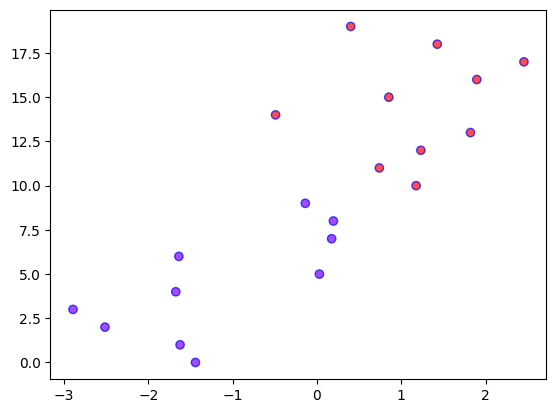

In [16]:
# apply Linear Discriminant Analysis to get 1 most important fetaure.
lda = LinearDiscriminantAnalysis(n_components=1)
x = lda.fit_transform(x, Y)


# plot the scatterplot
plt.scatter(
    x[:,0],np.arange(len(x)),
    c=Y,cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [17]:
# from above lot it looks like data is linearly saperable.

In [18]:
# classify using Logistic classifier
l_scores = cross_val_score(LogisticRegression(), x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))

scores of each fold :  [1.  1.  1.  1.  0.5 1.  1.  0.5 0.5 1. ]
average score :  0.85


In [19]:
# classify using SVM classifier kernel='sigmoid'
l_scores = cross_val_score(SVC(kernel='sigmoid'), x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))


scores of each fold :  [1.  1.  1.  1.  0.5 0.5 1.  0.5 0.5 1. ]
average score :  0.8


In [20]:
# classify using SVM classifier kernel='linear'
l_scores = cross_val_score(SVC(kernel='linear'), x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))


scores of each fold :  [1.  1.  1.  1.  0.5 0.5 1.  0.5 0.5 1. ]
average score :  0.8


In [21]:
# classify using SVM classifier kernel='rbf'
l_scores = cross_val_score(SVC(kernel='rbf'), x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))


scores of each fold :  [1.  1.  1.  1.  0.5 1.  1.  0.5 0.5 1. ]
average score :  0.85


In [22]:
# classify using SVM classifier kernel='poly'
l_scores = cross_val_score(SVC(kernel='poly'), x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))


scores of each fold :  [1.  1.  1.  1.  1.  0.5 1.  0.5 0.5 0.5]
average score :  0.8


In [23]:
# classify using random forest classifier
l_scores = cross_val_score(RandomForestClassifier(max_depth=3, random_state=0), x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))


scores of each fold :  [1.  1.  1.  1.  0.5 1.  1.  1.  1.  0.5]
average score :  0.9


In [24]:
# classify using naive Bayesian classifier
l_scores = cross_val_score(GaussianNB(), x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))


scores of each fold :  [1.  1.  1.  1.  0.5 0.5 1.  0.5 0.5 1. ]
average score :  0.8


In [25]:
# classify using Decision tree classifier
l_scores = cross_val_score(tree.DecisionTreeClassifier(), x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))


scores of each fold :  [1.  1.  1.  1.  0.5 1.  1.  1.  1.  0.5]
average score :  0.9


In [26]:
"""
# Using KNN classifier
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()
"""
# 8 comes out to be best value

"\n# Using KNN classifier\nneighbors = np.arange(1, 11)\ntrain_accuracy = np.empty(len(neighbors))\ntest_accuracy = np.empty(len(neighbors))\n  \n# Loop over K values\nfor i, k in enumerate(neighbors):\n    knn = KNeighborsClassifier(n_neighbors=k)\n    knn.fit(X_train, y_train)\n      \n    # Compute training and test data accuracy\n    train_accuracy[i] = knn.score(X_train, y_train)\n    test_accuracy[i] = knn.score(X_test, y_test)\n  \n# Generate plot\nplt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')\nplt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')\n  \nplt.legend()\nplt.xlabel('n_neighbors')\nplt.ylabel('Accuracy')\nplt.show()\n"

In [27]:
# classify using KNN classifier
lda_classifier_knn = KNeighborsClassifier(n_neighbors=8)
l_scores = cross_val_score(lda_classifier_knn, x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))


scores of each fold :  [1.  1.  1.  1.  0.5 0.5 1.  0.5 0.5 1. ]
average score :  0.8


In [28]:
data = {
    'LogisticRegression' : 0.85,
    'SVC sigmoid' : 0.8,
    'KNeighborsClassifier ' : 0.8,
    'RandomForestClassifier' : 0.9,
    'DecisionTreeClassifier' : 0.9,
    'GaussianNB' : 0.8,
    'SVC linear' : 0.8,
    'SVC rbf' : 0.85,
    'SVC poly' : 0.8
}
classification_lda = pd.DataFrame(data.items(), columns = ['algorithm', 'accuracy'])
classification_lda = classification_lda.sort_values(by=['accuracy'], ascending=False)
classification_lda

,algorithm,accuracy
3,RandomForestClassifier,0.90
4,DecisionTreeClassifier,0.90
0,LogisticRegression,0.85
7,SVC rbf,0.85
1,SVC sigmoid,0.80
2,KNeighborsClassifier,0.80
5,GaussianNB,0.80
6,SVC linear,0.80
8,SVC poly,0.80


# Part 2
### Feature selection with 2 features  
these 2 features seems to be promising and selected with intution 

In [29]:
dfs = df [['spectral_centroid_mean', 'energy_entropy_mean']]

In [30]:
dfs.head()

,spectral_centroid_mean,energy_entropy_mean
0,0.266911,3.242154
1,0.296077,3.203377
2,0.213665,3.250519
3,0.203469,3.282597
4,0.282089,3.260459


In [31]:
scs = StandardScaler()
x = scs.fit_transform(dfs.values)

In [32]:
len(x), len(Y)

(20, 20)

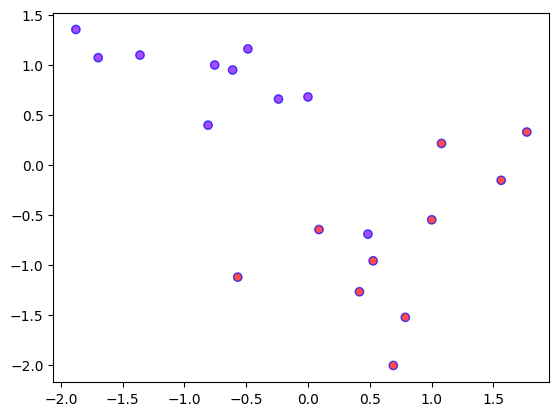

In [33]:
# plot the scatterplot
plt.scatter(
    x[:,0],x[:,1],c=Y,cmap='rainbow',
  alpha=0.7,edgecolors='b'
)

In [34]:
# from above plot data does not have a clean saperation

In [35]:
"""
# split in train and test
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=11)

# Using KNN classifier
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

# k = 7 seems to be the value
"""


"\n# split in train and test\nX_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=11)\n\n# Using KNN classifier\nneighbors = np.arange(1, 9)\ntrain_accuracy = np.empty(len(neighbors))\ntest_accuracy = np.empty(len(neighbors))\n  \n# Loop over K values\nfor i, k in enumerate(neighbors):\n    knn = KNeighborsClassifier(n_neighbors=k)\n    knn.fit(X_train, y_train)\n      \n    # Compute training and test data accuracy\n    train_accuracy[i] = knn.score(X_train, y_train)\n    test_accuracy[i] = knn.score(X_test, y_test)\n  \n# Generate plot\nplt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')\nplt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')\n  \nplt.legend()\nplt.xlabel('n_neighbors')\nplt.ylabel('Accuracy')\nplt.show()\n\n# k = 7 seems to be the value\n"

In [36]:
# from above k=7 seems a good value.

# classify using KNN classifier
classifier = KNeighborsClassifier(n_neighbors=7)
l_scores = cross_val_score(classifier, x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))


scores of each fold :  [1.  1.  1.  1.  1.  1.  1.  1.  0.5 1. ]
average score :  0.95


In [37]:
# classify using Logistic classifier
classifier = LogisticRegression()
l_scores = cross_val_score(classifier, x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))


scores of each fold :  [1.  1.  1.  1.  1.  1.  1.  1.  0.5 1. ]
average score :  0.95


In [38]:
# classify using SVM classifier kernel='sigmoid'
classifier = SVC(kernel='sigmoid') 
l_scores = cross_val_score(classifier, x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))


scores of each fold :  [1.  1.  1.  1.  1.  1.  1.  1.  0.5 1. ]
average score :  0.95


In [39]:
# classify using SVM classifier kernel='linear'
classifier = SVC(kernel='linear') 
l_scores = cross_val_score(classifier, x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))


scores of each fold :  [1.  1.  1.  1.  1.  1.  1.  1.  0.5 1. ]
average score :  0.95


In [40]:
# classify using SVM classifier kernel='rbf'
classifier = SVC(kernel='rbf') 
l_scores = cross_val_score(classifier, x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))


scores of each fold :  [1.  1.  1.  1.  1.  1.  1.  1.  0.5 1. ]
average score :  0.95


In [41]:
# classify using SVM classifier kernel='poly'
classifier = SVC(kernel='poly') 
l_scores = cross_val_score(classifier, x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))


scores of each fold :  [1.  1.  1.  1.  1.  1.  1.  1.  0.5 1. ]
average score :  0.95


In [42]:
# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=3, random_state=0)
l_scores = cross_val_score(classifier, x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))


scores of each fold :  [1.  0.5 1.  1.  1.  1.  1.  1.  0.5 1. ]
average score :  0.9


In [43]:
# classify using Decision tree classifier
classifier = tree.DecisionTreeClassifier()
l_scores = cross_val_score(classifier, x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))



scores of each fold :  [1.  1.  1.  0.5 0.5 1.  0.5 0.5 0.  1. ]
average score :  0.7


In [44]:
# classify using naive Bayesian classifier
classifier = GaussianNB()
l_scores = cross_val_score(classifier, x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))



scores of each fold :  [1.  1.  1.  1.  1.  1.  1.  1.  0.5 1. ]
average score :  0.95


In [45]:
data_fs = {
    'LogisticRegression' : 0.95,
    'KNeighborsClassifier ' : 0.95,
    'DecisionTreeClassifier' : 0.75,
    'RandomForestClassifier' : 0.9,
    'GaussianNB' : 0.95,
    'SVC sigmoid' : 0.95,
    'SVC linear' : 0.95,
    'SVC rbf' : 0.95,
    'SVC poly' : 0.95
}
classification_fs = pd.DataFrame(data_fs.items(), columns = ['algorithm', 'accuracy'])
classification_fs = classification_fs.sort_values(by=['accuracy'], ascending=False)
classification_fs

,algorithm,accuracy
0,LogisticRegression,0.95
1,KNeighborsClassifier,0.95
4,GaussianNB,0.95
5,SVC sigmoid,0.95
6,SVC linear,0.95
7,SVC rbf,0.95
8,SVC poly,0.95
3,RandomForestClassifier,0.90
2,DecisionTreeClassifier,0.75


# Part 3
### Feature selection with correlation

In [46]:
matrix = df.corr()
print(type(matrix))

<class 'pandas.core.frame.DataFrame'>


In [47]:
matrix.head()

,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,spectral_flux_mean,spectral_rolloff_mean,mfcc_1_mean,mfcc_2_mean,...,delta chroma_7_std,delta chroma_8_std,delta chroma_9_std,delta chroma_10_std,delta chroma_11_std,delta chroma_12_std,delta chroma_std_std,bpm,ratio,Y
zcr_mean,1.000000,-0.299074,-0.189191,0.773147,0.158312,0.774101,-0.257574,0.875275,0.117874,-0.799904,...,-0.207717,0.163590,-0.405734,0.063971,-0.100461,0.009119,-0.264488,-0.556316,0.054281,0.310127
energy_mean,-0.299074,1.000000,0.494486,-0.387603,-0.145026,-0.244260,-0.170102,-0.254747,0.476526,0.434879,...,0.115808,-0.005684,0.119349,-0.309726,-0.348977,-0.137514,-0.050229,0.289119,0.137419,-0.266762
energy_entropy_mean,-0.189191,0.494486,1.000000,-0.579102,-0.625561,0.326868,-0.515662,-0.047277,0.435040,0.549821,...,-0.631560,0.214248,-0.211965,-0.489910,-0.440483,-0.173766,-0.495805,0.159778,-0.628242,-0.768179
spectral_centroid_mean,0.773147,-0.387603,-0.579102,1.000000,0.704808,0.327212,0.016431,0.748436,0.060003,-0.855812,...,0.249736,-0.045739,-0.076143,0.342196,0.259739,0.216959,0.264856,-0.420499,0.433434,0.735126
spectral_spread_mean,0.158312,-0.145026,-0.625561,0.704808,1.000000,-0.336888,0.214086,0.280485,0.066725,-0.379743,...,0.665128,-0.317158,0.243967,0.611809,0.591503,0.451234,0.633021,-0.110552,0.637350,0.853187


In [48]:
matrix.shape

(139, 139)

In [49]:
feature_imp = matrix[['Y']]


In [50]:
feature_imp = feature_imp.apply(abs)
feature_imp = feature_imp.sort_values(['Y'], ascending=False)
feature_imp = feature_imp[1:]
print (feature_imp.shape)
print(feature_imp.head(20))

(138, 1)
                                    Y
spectral_spread_mean         0.853187
energy_entropy_mean          0.768179
spectral_centroid_mean       0.735126
energy_entropy_std           0.733476
chroma_5_std                 0.728818
delta energy_entropy_std     0.721885
mfcc_3_mean                  0.684944
delta spectral_centroid_std  0.684245
delta chroma_5_std           0.677086
mfcc_5_mean                  0.674874
delta spectral_entropy_std   0.662506
delta spectral_rolloff_std   0.652090
delta mfcc_11_mean           0.643226
delta mfcc_1_std             0.640961
spectral_rolloff_std         0.627531
delta chroma_10_std          0.617266
delta zcr_std                0.610088
delta energy_std             0.556666
ratio                        0.522684
delta chroma_7_std           0.513778


In [51]:
# Lets take top 03 feature for the mdel training
dfsc = df[list(feature_imp.head(3).index)]
dfsc.head()

,spectral_spread_mean,energy_entropy_mean,spectral_centroid_mean
0,0.222966,3.242154,0.266911
1,0.212635,3.203377,0.296077
2,0.217639,3.250519,0.213665
3,0.195141,3.282597,0.203469
4,0.239487,3.260459,0.282089


In [52]:
dfsc.shape

(20, 3)

In [53]:
# Scale the input features
sc = StandardScaler()
x = sc.fit_transform(dfsc.values)

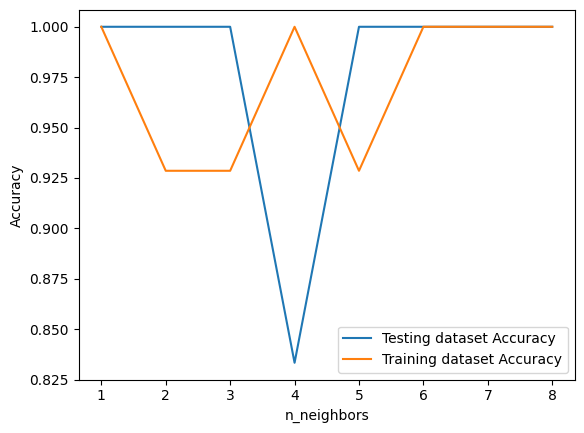

In [54]:
# split in train and test
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=11)
# Using KNN classifier
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()


In [55]:
# classify using KNN classifier
classifier = KNeighborsClassifier(n_neighbors=6)
l_scores = cross_val_score(classifier, x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))



scores of each fold :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
average score :  1.0


In [56]:
# classify using Logistic classifier
classifier = LogisticRegression()
l_scores = cross_val_score(classifier, x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))



scores of each fold :  [1.  1.  1.  1.  1.  1.  1.  1.  0.5 1. ]
average score :  0.95


In [57]:
# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=3, random_state=0)
l_scores = cross_val_score(classifier, x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))



scores of each fold :  [1.  1.  1.  1.  1.  1.  1.  1.  0.5 1. ]
average score :  0.95


In [58]:
# classify using Decision tree classifier
classifier = tree.DecisionTreeClassifier()
l_scores = cross_val_score(classifier, x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))


scores of each fold :  [1.  1.  0.5 1.  0.5 1.  1.  1.  0.  1. ]
average score :  0.8


In [59]:
# classify using naive Bayesian classifier
classifier = GaussianNB()
l_scores = cross_val_score(classifier, x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))


scores of each fold :  [1.  1.  1.  1.  1.  1.  1.  1.  0.5 1. ]
average score :  0.95


In [60]:
# classify using SVM classifier
classifier = SVC(kernel='sigmoid') 
l_scores = cross_val_score(classifier, x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))


scores of each fold :  [1.  1.  1.  1.  1.  1.  1.  1.  0.5 1. ]
average score :  0.95


In [61]:
# classify using SVM classifier
classifier = SVC(kernel='rbf') 
l_scores = cross_val_score(classifier, x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))



scores of each fold :  [1.  1.  1.  1.  1.  1.  1.  1.  0.5 1. ]
average score :  0.95


In [62]:
# classify using SVM classifier
classifier = SVC(kernel='poly') 
l_scores = cross_val_score(classifier, x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))


scores of each fold :  [1.  1.  1.  1.  1.  1.  1.  1.  0.5 1. ]
average score :  0.95


In [63]:
# classify using SVM classifier
classifier = SVC(kernel='linear') 
l_scores = cross_val_score(classifier, x, Y, cv=10)
print ( 'scores of each fold : ', l_scores)
print ( 'average score : ', np.average(l_scores))


scores of each fold :  [1.  1.  0.5 1.  1.  1.  1.  1.  0.5 1. ]
average score :  0.9


In [64]:
data_fsc = {
    'LogisticRegression' :0.95 ,
    'KNeighborsClassifier ' :1.0 ,
    'RandomForestClassifier' :0.95 ,
    'DecisionTreeClassifier' :0.85 ,
    'GaussianNB' :0.95,
    'SVC sigmoid' :0.95 ,
    'SVC linear' :0.90 ,
    'SVC rbf' :0.95,
    'SVC poly' :0.95 
}
classification_fsc = pd.DataFrame(data_fsc.items(), columns = ['algorithm', 'accuracy'])
classification_fsc = classification_fsc.sort_values(by=['accuracy'], ascending=False)
classification_fsc

,algorithm,accuracy
1,KNeighborsClassifier,1.00
0,LogisticRegression,0.95
2,RandomForestClassifier,0.95
4,GaussianNB,0.95
5,SVC sigmoid,0.95
7,SVC rbf,0.95
8,SVC poly,0.95
6,SVC linear,0.90
3,DecisionTreeClassifier,0.85
